In [1]:
import cv2
import json
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
# train_dir = 'label'
# train_json = glob.glob(train_dir + '/*.json')

In [3]:
# train_dir = 'image/'

In [4]:
# import shutil

# for name in train_json:
#     with open(name, 'r',encoding='utf-8') as j:
#         data = json.load(j)
#         f_name = data['image_file_name']
#         c_name = data['value_6']
#         fr = 'image/'+f_name
#         to = 'img/'+ c_name + '/' + f_name
#         shutil.move(fr,to)

In [5]:
# val_json = glob.glob('val_label/*.json')
# len(val_json)

In [6]:
# import shutil

# for name in val_json:
#     with open(name, 'r',encoding='utf-8') as j:
#         data = json.load(j)
#         f_name = data['image_file_name']
#         c_name = data['value_6']
#         fr = 'val_image/'+f_name
#         to = 'val_image/'+ c_name + '/' + f_name
#         shutil.move(fr,to)

In [7]:
train_dir = 'train_image'
valid_dir = 'val_image'

In [8]:
train_datagen = ImageDataGenerator(rotation_range=20,
                                 #   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   brightness_range=(0.0, 1.0),
                                   fill_mode='wrap',
                                   validation_split=0.2,
                                  
                                   horizontal_flip=True)

# test_datagen = ImageDataGenerator(rotation_range=20,
#                                  #   rescale=1./255,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    brightness_range=(0.0, 1.0),
#                                    fill_mode='wrap',
#                                    validation_split=0.2,
#                                    subset='validation',
#                                    horizontal_flip=True)

valid_datagen = ImageDataGenerator(rotation_range=20,
                                 #   rescale=1./255,                                   
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   brightness_range=(0.0, 1.0),
                                   fill_mode='wrap',
                                #    validation_split=0.2,
                                   horizontal_flip=True)

In [9]:
train_generator = train_datagen.flow_from_directory(train_dir, class_mode='sparse', seed=123, target_size=(64,64), batch_size=32, subset='training')
test_generator = train_datagen.flow_from_directory(train_dir, class_mode='sparse', seed=123, target_size=(64,64), batch_size=32, subset='validation')
valid_generator = valid_datagen.flow_from_directory(valid_dir, class_mode='sparse', seed=123, target_size=(64,64), batch_size=32)

Found 14812 images belonging to 4 classes.
Found 3701 images belonging to 4 classes.
Found 5288 images belonging to 4 classes.


In [10]:
len(train_generator)

463

In [11]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.applications.efficientnet.EfficientNetB1(
        include_top=False,
        weights='imagenet',
        input_shape=(64,64,3),
        pooling='avg',
        classes = 4
    ),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb1 (Functional)  (None, 1280)              6575239   
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 6,580,363
Trainable params: 6,518,308
Non-trainable params: 62,055
_________________________________________________________________


In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [15]:
history = model.fit(train_generator,
                     validation_data=test_generator,
                     epochs=60,
                     steps_per_epoch=len(train_generator),
                     validation_steps=len(test_generator)
                     )

Epoch 1/60
463/463 [==============================] - 139s 270ms/step - loss: 0.8050 - accuracy: 0.6998 - val_loss: 0.7580 - val_accuracy: 0.7093
Epoch 2/60
463/463 [==============================] - 121s 262ms/step - loss: 0.6768 - accuracy: 0.7351 - val_loss: 0.6907 - val_accuracy: 0.7303
Epoch 3/60
463/463 [==============================] - 119s 257ms/step - loss: 0.6499 - accuracy: 0.7453 - val_loss: 0.6349 - val_accuracy: 0.7433
Epoch 4/60
463/463 [==============================] - 120s 259ms/step - loss: 0.6414 - accuracy: 0.7472 - val_loss: 0.7610 - val_accuracy: 0.6909
Epoch 5/60
463/463 [==============================] - 118s 256ms/step - loss: 0.6300 - accuracy: 0.7520 - val_loss: 0.6892 - val_accuracy: 0.7222
Epoch 6/60
463/463 [==============================] - 118s 255ms/step - loss: 0.6253 - accuracy: 0.7487 - val_loss: 0.6418 - val_accuracy: 0.7422
Epoch 7/60
463/463 [==============================] - 121s 261ms/step - loss: 0.6122 - accuracy: 0.7539 - val_loss: 0.6412 -

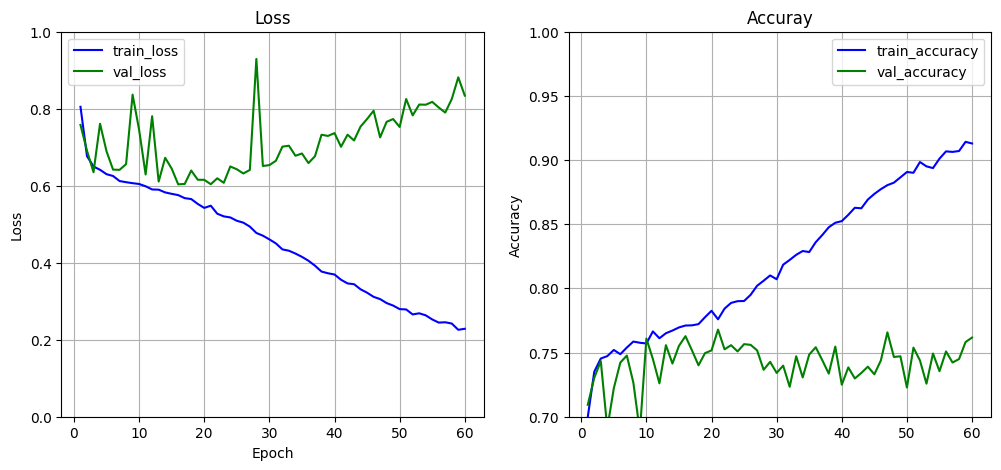

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,1.0])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.7,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()